In [365]:
import numpy as np 
from torch import nn
import torch
import matplotlib.pyplot as plt
import gymnasium as gym
from torch.optim import Adam
from torch.nn import MSELoss,HuberLoss
from torch.nn import init
# from Buffers.ExperienceReplayBuffer import ExperienceReplay


In [366]:
class QNetfork (nn.Module):
    def __init__(self,input_num,h1,h2,h3,output_num):
        super().__init__()
        self.linear1 = nn.Linear(input_num,h1)
        self.linear2 = nn.Linear(h1,h2)
        self.linear3 = nn.Linear(h2,h3)
        self.linear4 = nn.Linear(h3,output_num)
        
    
    def forward(self,x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.relu(self.linear3(x))
        x = self.linear4(x)
        return x 

(array([-0.4270405,  0.       ], dtype=float32), {})


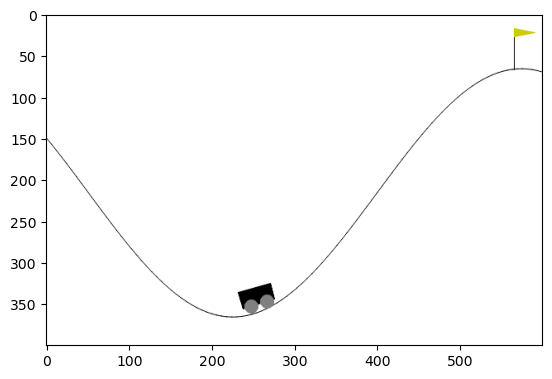

In [367]:
ENV_NAME = "MountainCar-v0"
SEED = 13 
LEARNING_RATE = 0.01
BUFFER_SIZE =10000
GAMMA = 0.995
EPISODES= 1000
STEPS=1000
BATCH_SIZE = 256
env = gym.make(ENV_NAME,render_mode="rgb_array")
print(env.reset(seed=SEED))
action_num = env.action_space.n
state_num  = env.observation_space.shape[0]
plt.imshow(env.render());

In [368]:
from torch import le


class ExperienceReplay():
    def __init__(self,max_value):
        self.experience_replay = {"old_state":[],"old_action":[],"reward":[],"new_state":[]}
        self.max_value = max_value
        
    def append(self,old_state,old_action,reward,new_state):
        if(self.size() >= self.max_value):
            for key in self.experience_replay.keys():
                self.experience_replay[key].pop(0)
        self.experience_replay["old_state"].append(old_state)
        self.experience_replay["old_action"].append(old_action)
        self.experience_replay["reward"].append(reward)
        self.experience_replay["new_state"].append(new_state)
        
    def sample(self,batch_size):
        self.batch ={}
        indices = np.random.choice(range(self.size()),batch_size,replace=False)
        for key in self.experience_replay.keys():
            self.batch[key]=np.array(self.experience_replay[key])[indices]
        return self.batch
    def size(self):
        return len(self.experience_replay["old_state"])

In [369]:
torch.manual_seed(SEED)
model = QNetfork(state_num,128,64,32,action_num)
target_model = QNetfork(state_num,128,64,32,action_num)
target_model.load_state_dict(model.state_dict())
criterion = MSELoss()
optimizer = Adam(model.parameters(),lr=LEARNING_RATE)
buffer = ExperienceReplay(BUFFER_SIZE)

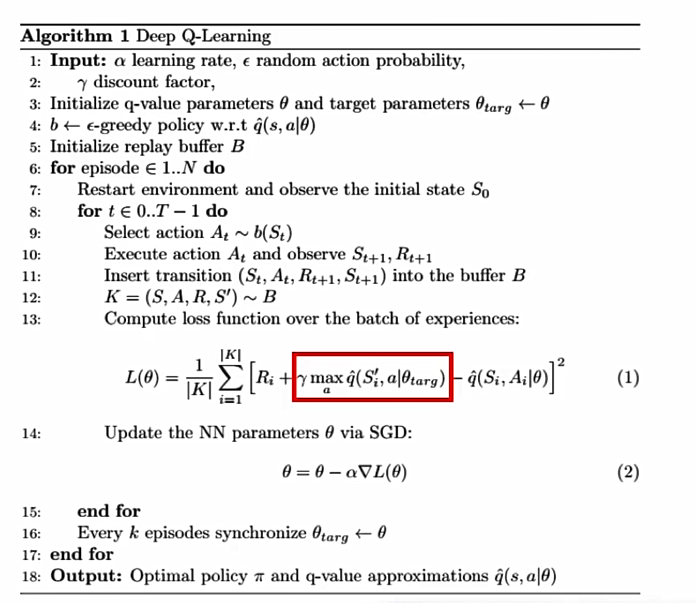

In [ ]:

from torch import Tensor
from Exploration.EpsilonGreedyExploration import epsilon_greedy
EPSILON=0.9
def train():
    for episode in range(EPISODES):
        
        old_observation , info =env.reset(seed=SEED)   
        for step in range(STEPS):
            actions:Tensor = model(torch.tensor(old_observation))
            action = epsilon_greedy(actions.detach().numpy(),EPSILON)
            new_observation ,reward,terminated,truncated,_ = env.step(action)
            buffer.append(old_observation,action,reward,new_observation)
            
            if(buffer.size() >= BATCH_SIZE):
                batch = buffer.sample(BATCH_SIZE)
                q_value = model(torch.from_numpy(batch["old_state"]))
                
            #     q_value_target = target_model(batch[3])
            #     optimizer.zero_grad()
            #     loss:torch.Tensor = criterion(batch[2] + GAMMA*torch.max(q_value_target,axis=1),q_value(batch[1]))
            #     print(loss)
            #     loss.backward()
            #     optimizer.step()
            # if step%100 == 0:
            #     target_model.load_state_dict(model.state_dict())


In [384]:
train()

tensor([[ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
        [ 0.2138,  0.0561, -0.0638],
 

KeyboardInterrupt: 

In [378]:
arr1 = [1,2,3,4,5,5]
arr =np.array([])
dic = {"a":arr}
np.append(dic["a"],2)


array([2.])